In [9]:
%load_ext autoreload
%autoreload 2

# Make sure the project root is in Python path
import sys, os
project_root = os.path.abspath("../..")  # one level up from /notebooks
if project_root not in sys.path:
    sys.path.append(project_root)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
from src.image_generation import moffat, sersic
import matplotlib as mpl

In [12]:
mpl.rcParams['image.cmap'] = 'grey'
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['axes.edgecolor'] = 'none'
mpl.rcParams['xtick.bottom'] = False
mpl.rcParams['xtick.labelbottom'] = False
mpl.rcParams['ytick.left'] = False
mpl.rcParams['ytick.labelleft'] = False
mpl.rcParams['axes.grid'] = False

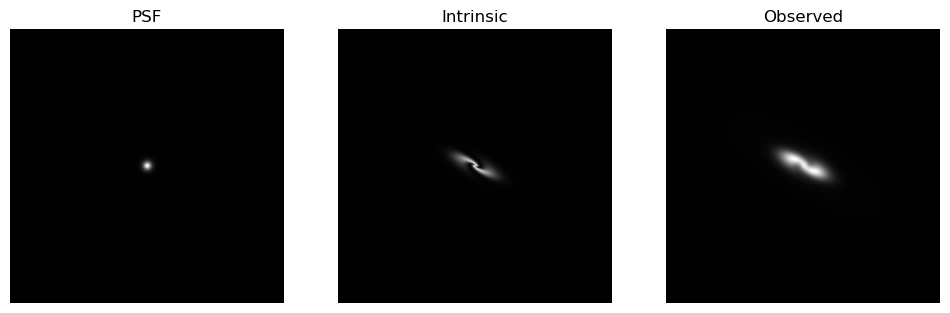

In [13]:
width= 400
height = 400
image_psf = moffat(400, 400, 3.5, 10)
image_intrinsic = sersic(height, width, width/2, height/2, k=1.5, n=4, inclination=np.radians(70), rotation=np.radians(30),  n_arms=2, bulge_strength=1, Rc=30)
# image_intrinsic = sersic(height, width, width/2, height/2, 1.5, 4)

image = fftconvolve(image_intrinsic, image_psf, mode="same")

fig, axs = plt.subplots(1, 3, figsize=(12, 8))

im0 =axs[0].imshow(image_psf)
axs[0].set_title("PSF")

im1 = axs[1].imshow(image_intrinsic)
axs[1].set_title("Intrinsic")

im1 = axs[2].imshow(image)
axs[2].set_title("Observed")
plt.show()

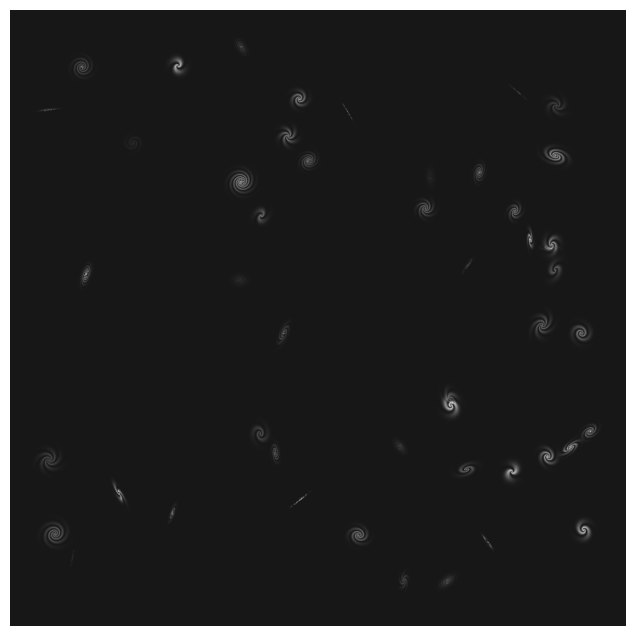

In [14]:
N_galaxies = 50
height = 1000
width = 1000
margin = 50
a = 8
b = 8

centers = []
true_F = []
image = np.zeros((height, width), dtype=float)
for _ in range(N_galaxies):
    xc = np.random.uniform(0 + margin, width - margin)
    yc = np.random.uniform(0 + margin, height - margin)
    k = np.random.uniform(1e-3, 1)
    n = np.random.uniform(0.2, 0.5)
    rotation = np.random.uniform(-np.pi / 2, np.pi / 2)
    inclination = np.random.uniform(0.1, np.pi / 2)
    n_arms = np.random.randint(2, 6)
    winding = np.random.uniform(1, 5)
    arm_width = np.random.uniform(0.001, 0.004)
    bulge_strength = np.random.uniform(0.5, 1)
    Rc = np.random.uniform(10, 15)
    galaxy_image = sersic(height, width, xc, yc, k, n, inclination=inclination, rotation=rotation, Rc=Rc, n_arms=n_arms,
                    winding=winding, bulge_strength=bulge_strength,
                    direction=np.random.choice([-1, 1])) * np.random.uniform(1, 10)
    image += galaxy_image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()

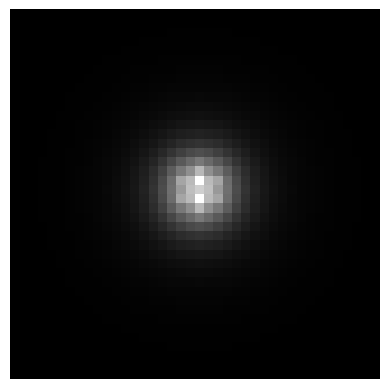

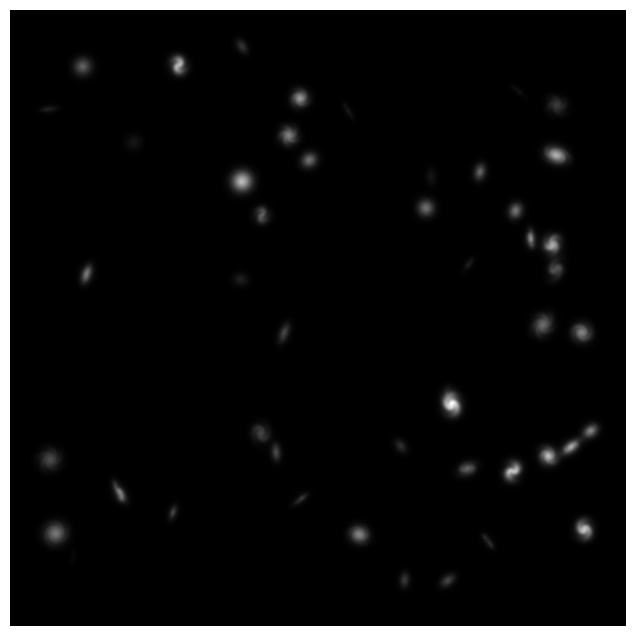

In [15]:
image_psf = moffat(40, 40, 2, 5, n_spikes=6, rotation=np.pi/3, spike_strength=0.2, spike_width=0.2, Rc=2)
image_psf /= image_psf.sum()
plt.imshow(image_psf)
plt.show()
plt.figure(figsize=(8, 8))
plt.imshow(fftconvolve(image, image_psf, mode='same')+np.random.random(size=image.shape)*0)
plt.show()